In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import math


In [18]:
data = pd.read_excel('/content/evening clusterxlsx.xlsx',  parse_dates=True)

In [19]:

# Select features for the model
features = ['POWER (KW)', 'Temp (F)', 'Humidity (%)', '"WEEKEND/WEEKDAY"','SEASON']
# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[features])

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=features, index=data.index)

In [20]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data.iloc[i + seq_length, 0]  # Load is the target variable
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 24  # Using 24 hours of data to predict the next hour's load
X, y = create_sequences(scaled_data, seq_length)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=15, epochs=30, validation_split=0.2)

Epoch 1/30
62/62 [==============================] - 15s 96ms/step - loss: 0.0335 - val_loss: 0.0188
Epoch 2/30
62/62 [==============================] - 5s 81ms/step - loss: 0.0196 - val_loss: 0.0175
Epoch 3/30
62/62 [==============================] - 5s 83ms/step - loss: 0.0185 - val_loss: 0.0167
Epoch 4/30
62/62 [==============================] - 4s 67ms/step - loss: 0.0180 - val_loss: 0.0161
Epoch 5/30
62/62 [==============================] - 5s 83ms/step - loss: 0.0198 - val_loss: 0.0173
Epoch 6/30
62/62 [==============================] - 5s 81ms/step - loss: 0.0184 - val_loss: 0.0152
Epoch 7/30
62/62 [==============================] - 4s 67ms/step - loss: 0.0174 - val_loss: 0.0195
Epoch 8/30
62/62 [==============================] - 5s 88ms/step - loss: 0.0169 - val_loss: 0.0149
Epoch 9/30
62/62 [==============================] - 5s 75ms/step - loss: 0.0168 - val_loss: 0.0151
Epoch 10/30
62/62 [==============================] - 5s 75ms/step - loss: 0.0181 - val_loss: 0.0153
Epoch 11

In [23]:
predictions = model.predict(X_test)



9/9 [==============================] - 3s 59ms/step


In [ ]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mpe = (np.mean(np.abs((y_test - predictions) / predictions) )* 100)
print(mpe)
print('MSE:', mse)
print('MAE:', mae)
print('R²:', r2)


27.713433718574503
MSE: 0.0036114083623930474
MAE: 0.044193435748901
R²: 0.347771141469119


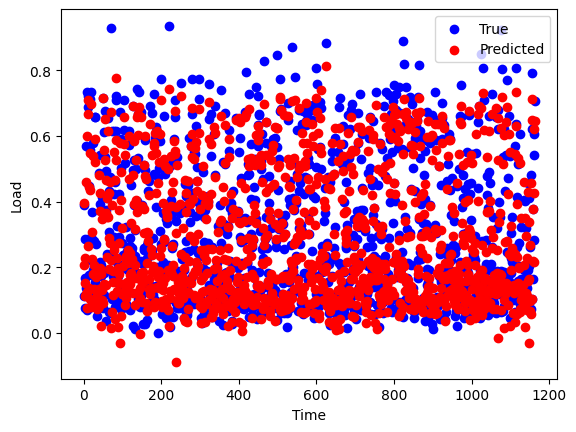

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='True')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

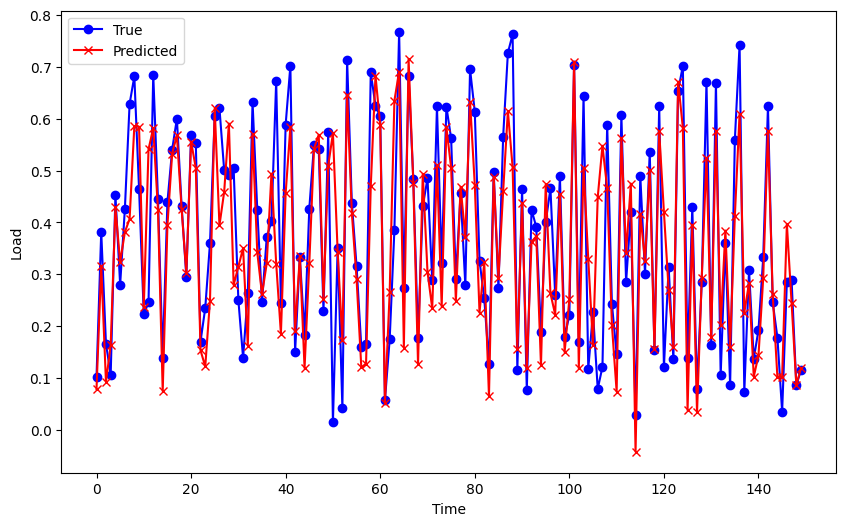

In [24]:
import matplotlib.pyplot as plt

# Define the number of points to display
num_points = 150

# Ensure we only take the first 150 points
y_test_subset = y_test[:num_points]
predictions_subset = predictions[:num_points]

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_subset)), y_test_subset, color='blue', marker='o', linestyle='-', label='True')
plt.plot(range(len(predictions_subset)), predictions_subset, color='red', marker='x', linestyle='-', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()
